In [ ]:
!pip install -q nltk scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from nltk.sentiment import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
df = pd.read_csv('/content/sample_data/netflix_asia_dataset.csv')

# **Segmentasi Pelanggan (RFM + K-Means)**

In [ ]:
rfm = df[['Recency', 'Frequency', 'Monetary']]
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segments'] = kmeans.fit_predict(rfm)

# **Prediksi Churn**

In [ ]:
X = df[['Recency', 'Frequency', 'Monetary', 'Subscription_Length_Months']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[176  11]
 [ 50   3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85       187
           1       0.21      0.06      0.09        53

    accuracy                           0.75       240
   macro avg       0.50      0.50      0.47       240
weighted avg       0.65      0.75      0.68       240



# **Analisis Sentimen**

In [ ]:
sia = SentimentIntensityAnalyzer()
df['Sentiment_Score'] = df['Review_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['Sentiment_Label'] = df['Sentiment_Score'].apply(
    lambda x: 'Positive' if x >= 0.2 else ('Negative' if x <= -0.2 else 'Neutral'))

# **Visualisasi**

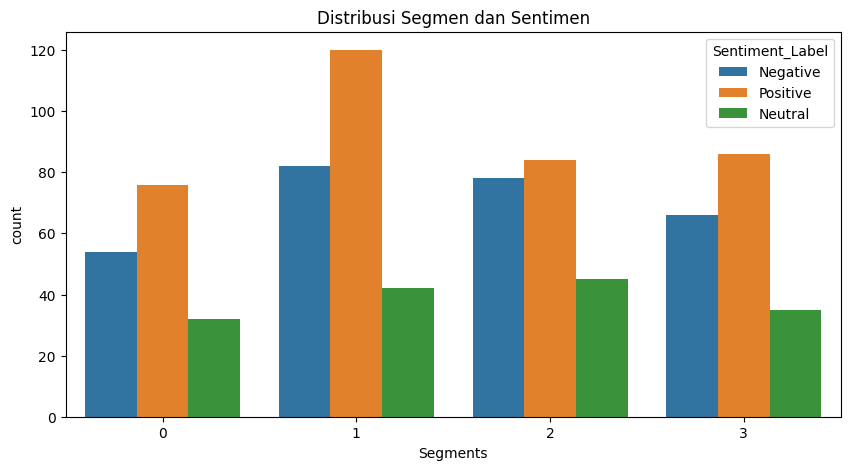

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Segments', hue='Sentiment_Label', data=df)
plt.title("Distribusi Segmen dan Sentimen")
plt.show()

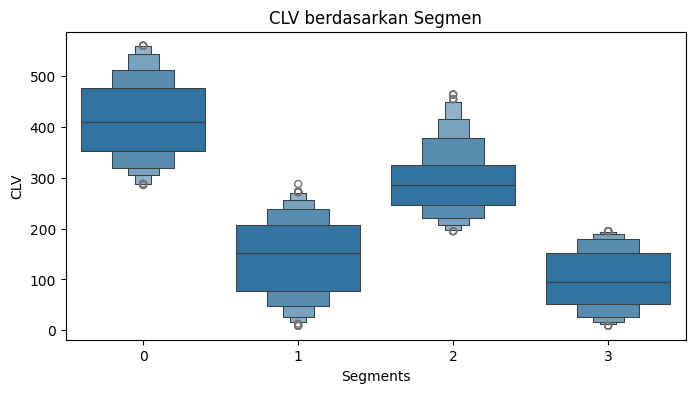

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxenplot(x='Segments', y='CLV', data=df)
plt.title("CLV berdasarkan Segmen")
plt.show()

In [ ]:
!pip install dash dash-bootstrap-components pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 22.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.1
    Uninstalling Flask-3.1.1:
      Successfully uninstalled Flask-3.1.1


# **Dashboard Analisis Managemen Hubungan Pelanggan**

In [ ]:
from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc
import plotly.express as px
import pandas as pd

In [ ]:
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.title = "Dashboard Analisis Manajemen Hubungan Pelanggan pada Netflix"

In [ ]:
rfm = df[['Recency', 'Frequency', 'Monetary']]

# Lakukan scaling (jika perlu)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Jalankan KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segments'] = kmeans.fit_predict(rfm_scaled)

# Cek hasil
print(df['Segments'].value_counts())

Segments
3    219
2    203
1    194
0    184
Name: count, dtype: int64


In [ ]:
pip install transformers

In [ ]:
!pip install -q streamlit pyngrok pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.4 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="w11wo/indonesian-roberta-base-sentiment-classifier")

def classify_sentiment(text):
    try:
        result = classifier(str(text))[0]['label']
        return result
    except:
        return 'Unknown'

df['Sentiment_Label'] = df['Review_Text'].apply(classify_sentiment)

Device set to use cpu


In [ ]:
app.layout = dbc.Container([
    html.H1("Dashboard Analisis Manajemen Hubungan Pelanggan pada Netflix", className="text-center my-4"),

    dbc.Row([
        dbc.Col([
            html.Label("Filter by Segment:"),
            dcc.Dropdown(
               options=[{'label': f'Segment {i}', 'value': i} for i in sorted(df['Segments'].unique())],
                value=None,
                id='segment-filter',
                placeholder='Select segment...',
                multi=True
            ),
        ], width=4),

        dbc.Col([
            html.Label("Filter by Sentiment:"),
            dcc.Dropdown(
                options=[{'label' : i, 'value': i} for i in df['Sentiment_Label'].unique()],
                value=None,
                id='sentiment-filter',
                placeholder='Select sentiment...',
                multi=True
            )
        ], width=4),
    ], className="mb-4"),

    dbc.Row([
        dbc.Col(dcc.Graph(id='clv-boxplot'), width=6),
        dbc.Col(dcc.Graph(id='sentiment-distribution'), width=6),
    ]),

    dbc.Row([
        dbc.Col(dcc.Graph(id='churn-bar'), width=12)
    ])
], fluid=True)


@app.callback(
    Output('clv-boxplot', 'figure'),
    Output('sentiment-distribution', 'figure'),
    Output('churn-bar', 'figure'),
    Input('segment-filter', 'value'),
    Input('sentiment-filter', 'value')
)
def update_graphs(selected_segments, selected_sentiments):
    dff = df.copy()
    if selected_segments:
        dff = dff[dff['Segments'].isin(selected_segments)]
    if selected_sentiments:
        dff = dff[dff['Sentiment_Label'].isin(selected_sentiments)]

    fig1 = px.box(dff, x='Segments', y='CLV', color='Segments', title="CLV per Segment")
    fig2 = px.histogram(dff, x='Sentiment_Label', color='Sentiment_Label', title="Sentiment Distribution")
    fig3 = px.histogram(dff, x='Churn', color='Segment', barmode='group',
                        title="Churn by Segment", labels={'Churn': 'Churn (1=Yes, 0=No)'})

    return fig1, fig2, fig3




In [ ]:
with open("app.py", "w") as f:
    f.write("""
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi
st.set_page_config(layout="wide")
st.title("📊 Analisis RFM & CLV - Netflix Asia")

# Load data
df = pd.read_csv("/content/sample_data/netflix_asia_dataset.csv")

# Tampilkan data awal
st.subheader("🔍 Cuplikan Data")
st.dataframe(df.head())

# Visualisasi Distribusi Recency
st.subheader("⏳ Distribusi Recency")
fig1, ax1 = plt.subplots()
sns.histplot(df['Recency'], bins=20, kde=True, ax=ax1)
st.pyplot(fig1)

# Visualisasi Distribusi Frequency
st.subheader("🔁 Distribusi Frequency")
fig2, ax2 = plt.subplots()
sns.histplot(df['Frequency'], bins=20, kde=True, ax=ax2)
st.pyplot(fig2)

# Visualisasi Distribusi Monetary
st.subheader("💰 Distribusi Monetary")
fig3, ax3 = plt.subplots()
sns.histplot(df['Monetary'], bins=20, kde=True, ax=ax3)
st.pyplot(fig3)

# Visualisasi CLV
st.subheader("📈 Distribusi Customer Lifetime Value (CLV)")
fig4, ax4 = plt.subplots()
sns.histplot(df['CLV'], bins=20, kde=True, ax=ax4)
st.pyplot(fig4)

# Segmentasi Pelanggan (opsional jika ada kolom 'Segment')
if 'Segment' in df.columns:
    st.subheader("🧩 Segmentasi Pelanggan")
    fig5, ax5 = plt.subplots()
    sns.countplot(data=df, x='Segment', order=df['Segment'].value_counts().index, palette='Set2', ax=ax5)
    ax5.set_ylabel("Jumlah Pelanggan")
    st.pyplot(fig5)
""")


In [ ]:
ngrok.kill()

In [ ]:
from pyngrok import ngrok
import subprocess


ngrok.kill()

ngrok.set_auth_token("2yEZhCBXWSFJkL8bb3KYVQYTOg6_4E6SPAzFot2ApyrPyjUgS")
public_url = ngrok.connect(8501)
print(f"🌐 Ngrok URL: {public_url}")

#!streamlit run app.py --server.port 8501 --server.enableCORS false
process = subprocess.Popen(["streamlit", "run", "app.py", "--server.port=8501"])

🌐 Ngrok URL: NgrokTunnel: "https://3f0a-34-106-151-59.ngrok-free.app" -> "http://localhost:8501"
